In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [8]:
path = ''
file = '/wall.txt'
folders = ['cyl-reference-full']

In [9]:
with open(path+folders[0]+file) as f:
    print(f.readline())
    
data = []
    
for folder in folders:
    data.append(np.loadtxt(path+folder+file, skiprows=1))

x y z n T rho p Px Py Pz Mx My Mz 



In [10]:
#a = a[a[:, 0].argsort()]

In [11]:
Na = 6.02214129e+23
kB = 1.381e-23
Ru = 8.3144598

Mol = 40e-3
Rg = Ru / Mol
m = Mol / Na

g = 5.0 / 3.0
d = 3.418e-10

Pr = 2.0 / 3.0

C = 144.4
T_0 = 273.11
mu_0 = 2.125e-5

In [12]:
mu_suth = lambda T: mu_0 * ((T_0 + C) / (T + C)) * (pow(T / T_0, 3.0 / 2.0))
mu = lambda T: mu_suth(200.0) * (pow(T / 200.0, 0.734))

In [13]:
l_s = 0.1524

n_s = 1.6967383084574999e+19
u_s = 2624.0
T_s = 200.0
v_s = np.sqrt(2 * Rg * T_s)
rho_s = m * n_s
p_s = rho_s * Rg * T_s

f_s = n_s * v_s ** 3

mu_s = mu(T_s)

S_s = u_s / v_s

In [14]:
zeros = np.zeros((len(data), data[0][:, 0].size))
x = zeros.copy()
y = zeros.copy()
z = zeros.copy()
n = zeros.copy()
T = zeros.copy()
rho = zeros.copy()
p = zeros.copy()
Px = zeros.copy()
Py = zeros.copy()
Pz = zeros.copy()
Mx = zeros.copy()
My = zeros.copy()
Mz = zeros.copy()

In [15]:
for i, a in enumerate(data):
    x[i, :] = a[:, 0]# / l_s
    y[i, :] = a[:, 1]# / l_s
    z[i, :] = a[:, 2]# / l_s
    n[i, :] = a[:, 3]# / n_s
    T[i, :] = a[:, 4]# / T_s
    rho[i, :] = a[:, 5]# / rho_s
    p[i, :] = a[:, 6]# / p_s
    Px[i, :] = a[:, 7]
    Py[i, :] = a[:, 8]
    Pz[i, :] = a[:, 9]
    Mx[i, :] = a[:, 10]# / (n_s * v_s ** 3)
    My[i, :] = a[:, 11]# / (n_s * v_s ** 3)
    Mz[i, :] = a[:, 12]# / (n_s * v_s ** 3)

In [16]:
angle = -np.arctan(y[0] / x[0])
angle = np.where(angle < 0, angle + np.pi, angle)
r = np.sqrt(x[0]**2 + y[0]**2)
R = np.mean(r)
distance_surface = R * angle
angle *= 180.0 / np.pi

normal = np.array([x[0] / r, y[0] / r])

In [17]:
Pn = normal[0, :] * Px + normal[1, :] * Py
Pt = np.sqrt(Px ** 2 + Py ** 2 + Pz ** 2 - Pn ** 2)
En = normal[0, :] * Mx + normal[1, :] * My
Et = np.sqrt(Mx ** 2 + My ** 2 + Mz ** 2 - En ** 2)

In [18]:
cp = 2 * (Pn) / (rho_s * u_s ** 2)
cf = 2 * (Pt) / (rho_s * u_s ** 2)
ch = 2 * (En) / (rho_s * u_s ** 3)

No handles with labels found to put in legend.


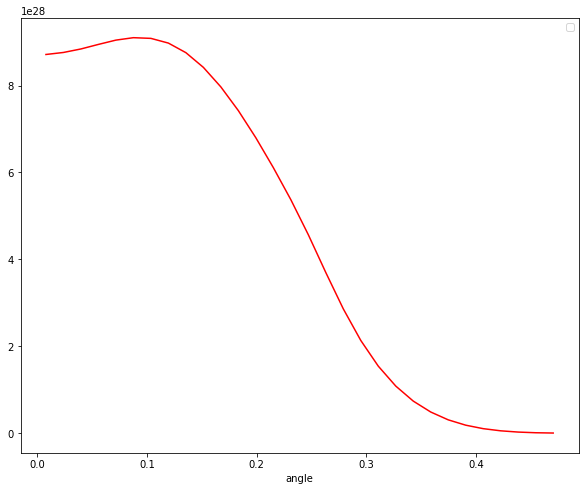

In [19]:
plt.figure(figsize=(10, 8))
for i, k in zip(range(len(folders)), ['r']*len(folders)):
    plt.plot(distance_surface, Mx[i, :], k)
plt.legend()
plt.xlabel("angle")

plt.show()

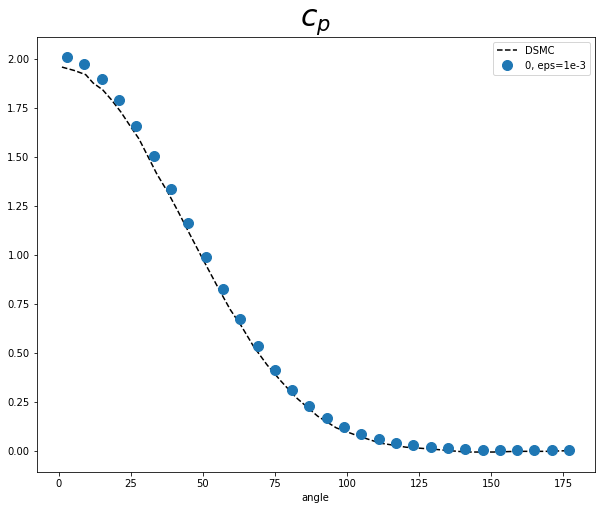

In [20]:
plt.figure(figsize=(10, 8))

a = -cp

d = np.loadtxt('DONE/cp.txt', delimiter=', ', skiprows=1)
plt.plot(d[:, 0], d[:, 1], 'k--', label='DSMC')

for i in range(len(folders)):
    plt.plot(angle, a[i, :], 'o', markersize=10, label=str(i) + ', eps=1e-3')
    
plt.legend()
plt.title("$c_p$", fontsize=30)
plt.savefig('cp.png', dpi=300)
plt.xlabel("angle")

plt.show()

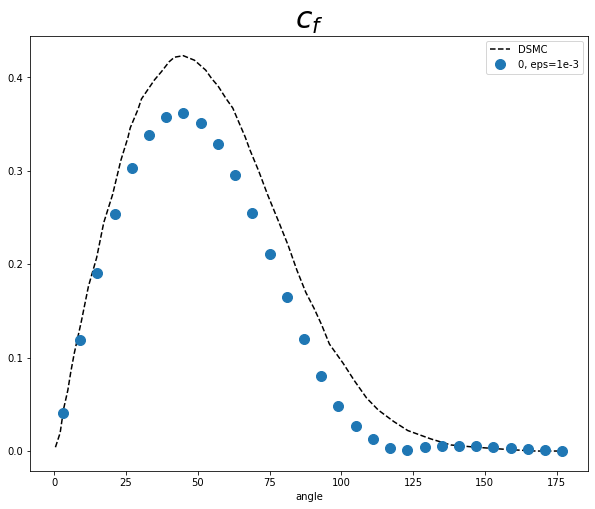

In [21]:
plt.figure(figsize=(10, 8))

a = cf

d = np.loadtxt('DONE/cf.txt', delimiter=', ', skiprows=1)
plt.plot(d[:, 0], d[:, 1], 'k--', label='DSMC')

for i in range(len(folders)):
    plt.plot(angle, a[i, :], 'o', markersize=10, label=str(i) + ', eps=1e-3')
    
plt.legend()
plt.title("$c_f$", fontsize=30)
plt.savefig('cf.png', dpi=300)
plt.xlabel("angle")

plt.show()

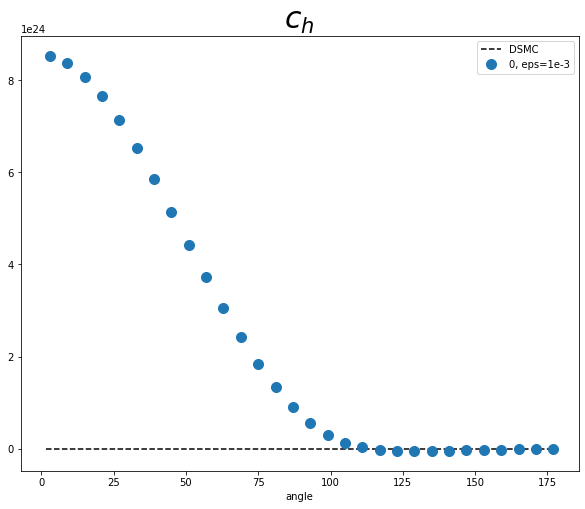

In [36]:
plt.figure(figsize=(10, 8))

a = -ch# / n_s / v_s**3

d = np.loadtxt('DONE/ch.txt', delimiter=', ', skiprows=1)
plt.plot(d[:, 0], d[:, 1], 'k--', label='DSMC')

for i in range(len(folders)):
    plt.plot(angle, a[i, :], 'o', markersize=10, label=str(i) + ', eps=1e-3')
    
plt.legend()
plt.title("$c_h$", fontsize=30)
plt.savefig('ch.png', dpi=300)
plt.xlabel("angle")

plt.show()

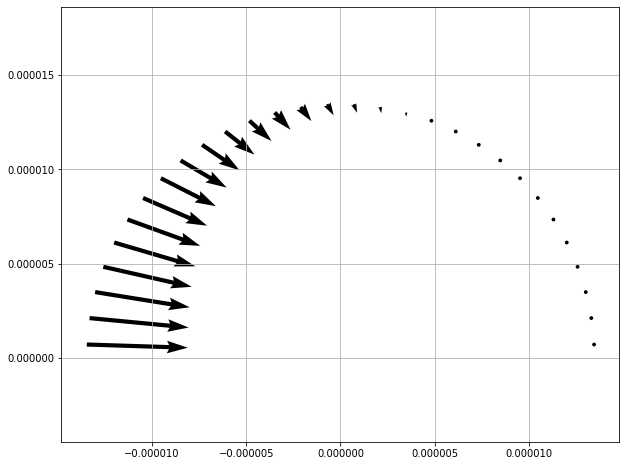

In [132]:
plt.figure(figsize=(10, 8))

#plt.quiver(x[0, :], y[0, :], normal[0, :], normal[1, :])
plt.quiver(x[0, :], y[0, :], Px[2, :], Py[2, :])

plt.axis('equal')
plt.grid()
plt.show()